### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

In [2]:
# Import modules 
import re
import string
from operator import itemgetter
import itertools


# Create Dictionary 
wdict = {}

# Open file and read lines 
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    
    nlines = 1
    while line:
        ########################### PART 1 ###########################
        # Check if the line contains the BOM character \ufeff
        if re.search(r'\ufeff', line):
            line = line.replace('\ufeff', '')

        #Check if there is punctuation in the line and remove it
        line = line.translate(str.maketrans('', '', string.punctuation))

        # Normalize the line to lowercase
        line = line.lower()
        ########################### PART 1 ###########################
                
        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

        
########################### PART 2 ###########################
# Sort the dictionary in descending order
sorted_dict = sorted(wdict.items(),key=itemgetter(1),reverse=True)

# Print the 100 most frequent repeated tokend
print(sorted_dict[:100])

# Determine sum all the occurences
total_occurrences = sum(frequency for word, frequency in sorted_dict)
# Determine the 90 % of this total 
top_90_percent_threshold = total_occurrences * 0.9

# Initialize cumulative_sum and word_count
cumulative_sum = 0
words_in_top_90_percent = 0

for word, frequency in sorted_dict: #Loop over the sorted dict
    cumulative_sum += frequency # Add the frequency to the cumulative sum
    words_in_top_90_percent += 1 # Add 1 to counter
    if cumulative_sum >= top_90_percent_threshold: # Stop when the objective is achived
        break
########################### PART 2 ###########################

print(f"\n\n{words_in_top_90_percent} words make up the 90% of all the occurences.")


# nitem = 0 ; maxitems = 100
# for item in wdict.items():
#     nitem += 1
#     print(item)
#     if nitem == maxitems: break


[('the', 9253), ('and', 5890), ('of', 4532), ('a', 4052), ('to', 3592), ('in', 2591), ('it', 2287), ('i', 2200), ('was', 2093), ('that', 1720), ('he', 1401), ('is', 1147), ('for', 1095), ('with', 1081), ('you', 1032), ('his', 961), ('had', 961), ('but', 952), ('on', 947), ('as', 881), ('this', 778), ('they', 758), ('at', 750), ('not', 721), ('all', 720), ('by', 713), ('one', 686), ('there', 627), ('were', 625), ('be', 616), ('my', 582), ('or', 581), ('from', 577), ('have', 571), ('out', 541), ('so', 535), ('up', 529), ('him', 523), ('we', 519), ('me', 515), ('when', 505), ('would', 478), ('which', 476), ('river', 457), ('an', 439), ('them', 424), ('no', 422), ('then', 404), ('said', 399), ('are', 387), ('if', 381), ('their', 378), ('now', 368), ('about', 346), ('time', 337), ('been', 335), ('down', 327), ('its', 322), ('could', 313), ('has', 304), ('will', 301), ('into', 300), ('what', 284), ('her', 278), ('two', 273), ('other', 270), ('do', 270), ('some', 269), ('new', 259), ('man', 2

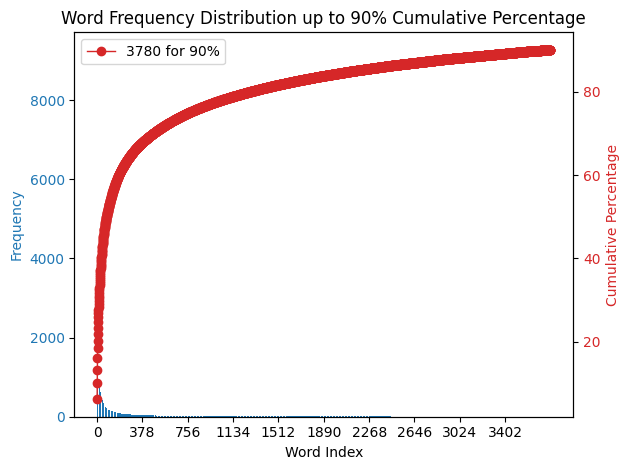

In [15]:
## Extra: Make pareto plot

import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

# Assuming sorted_words contains your sorted (word, frequency) tuples from the previous step

# Extract frequencies and words from the sorted list
frequencies = [frequency for word, frequency in sorted_dict]
words = [word for word, frequency in sorted_dict]

# Calculate cumulative frequencies and percentages
cumulative_frequencies = np.cumsum(frequencies)
total_occurrences = cumulative_frequencies[-1]
cumulative_percentages = 100 * cumulative_frequencies / total_occurrences

# Find the index where cumulative percentage reaches or exceeds 90%
cutoff_index = np.where(cumulative_percentages >= 90)[0][0] + 1  # Adjust for plotting

# Limit the data to the cutoff for 90% cumulative percentage
frequencies_up_to_90 = frequencies[:cutoff_index]
cumulative_percentages_up_to_90 = cumulative_percentages[:cutoff_index]

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for frequencies up to the point where 90% is achieved
color = 'tab:blue'
ax1.bar(range(len(frequencies_up_to_90)), frequencies_up_to_90, color=color)
ax1.set_xlabel('Word Index')
ax1.set_ylabel('Frequency', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Adjust x-axis ticks to avoid clutter
ax1.set_xticks(range(0, len(frequencies_up_to_90), max(1, len(frequencies_up_to_90)//10)))
ax1.set_xticklabels(range(0, len(frequencies_up_to_90), max(1, len(frequencies_up_to_90)//10)))

# Line plot for cumulative percentage up to 90%
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(range(len(cumulative_percentages_up_to_90)), cumulative_percentages_up_to_90, color=color, marker='o', linestyle='-', linewidth=1, label=f'{words_in_top_90_percent} for 90%')
ax2.set_ylabel('Cumulative Percentage', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Word Frequency Distribution up to 90% Cumulative Percentage')
plt.legend()
fig.tight_layout()
plt.show()



### Homework

1. **Tokenization** 

Write a generic Python tokenizer, which takes a set of text lines and tabulates the different words (that is, the tokens will be simply English words), keeping track of the frequency of each word.  Use the guidance in the accompanying notebook, 'Homework_1.ipynb'.

2. **Embedding**

Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

Lower left Section has three regions of interesting clusters that we have found and are presented here below. The regions are are about Names, States and Countries. 

**1. Names**

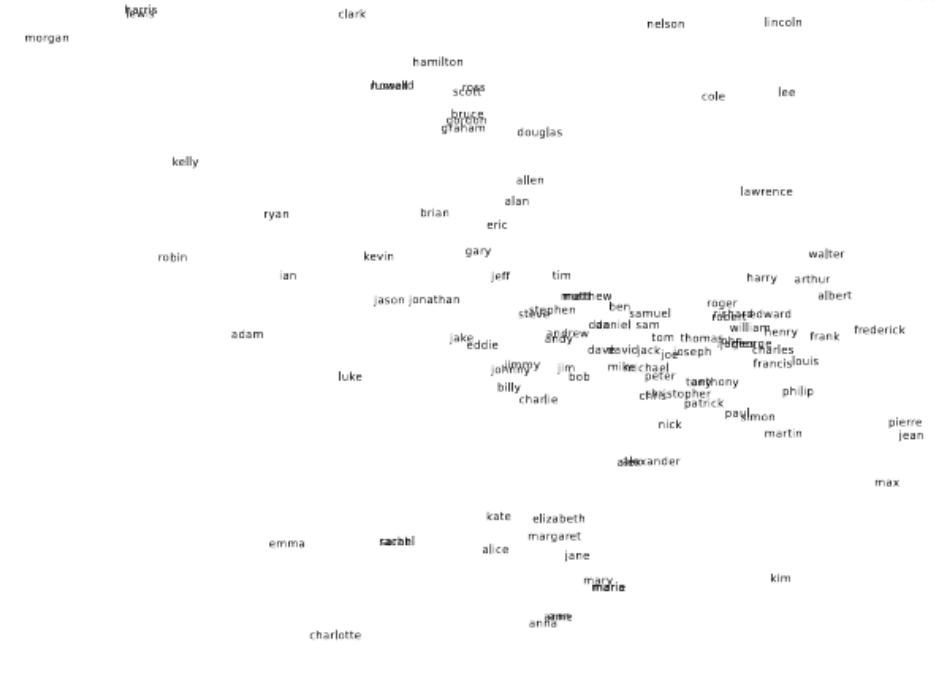


**2. States**

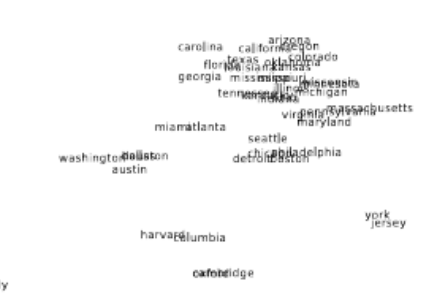


**3. Countries**

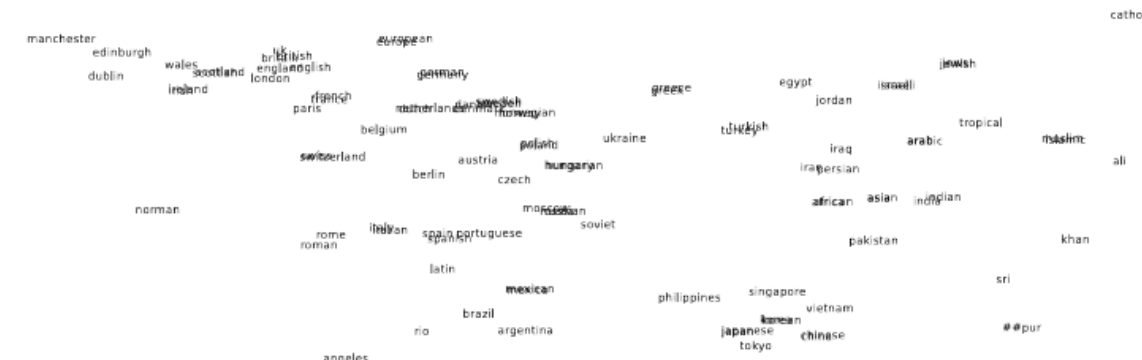
